<a href="https://colab.research.google.com/github/05satyam/machine-leanring-small-projects/blob/main/Predicting_transaction_categrios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve

from sklearn.model_selection import KFold
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import imp

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [214]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [215]:
def scoring(y_real, y_pred, model, X_data): # change y_test to y_real
    # Calculates and prints scores for the model
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average='macro')
    recall = recall_score(y_real, y_pred, average='macro')
    f1 = f1_score(y_real, y_pred, average='macro')

    print("Accuracy: {:.1%}".format(accuracy))
    print("Precision: {:.1%}".format(precision))
    print("Recall: {:.1%}".format(recall))
    print("F1: {:.1%}".format(f1))

    print('\n')
    print("Classification Report")
    print('\n')
    print(classification_report(y_real, y_pred))
    # Plots a confusion matrix graphic (defined below)
    plot = plot_c_matrix(model, X_data, y_real)

def plot_c_matrix(model, X_test, y_real):
    # Generates a confusion matrix graphic
    plot_confusion_matrix(model, X_test, y_real)
    plt.grid(False)
    plt.show()


In [3]:
dataSet = pd.read_excel("/content/TrainingDataSet.xlsx")

In [ ]:

#object of the dataframe as csv file
dataSet.to_csv ("TrainingDataSet.csv", index = None, header=True)

# read csv file and convert into object of dataset
df = pd.DataFrame(pd.read_csv("TrainingDataSet.csv"))





In [4]:
dataSet.shape

(40000, 14)

In [7]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...','.', '``', 'RECUR DEBIT CRD PMT', 'CHECK CRD PURCHASE', 'CHECK CRD PURCHASE', 'CHECK', 'PURCHASE', 'PUR', 'DEBIT','INTL', 'CARD', 'RECUR','CRD','PMT']


In [9]:
newDataset = dataSet.loc[:, ['trans_desc','default_brand','coalesced_brand','Category']]

In [154]:
newDataset['transc_detail'] = newDataset['default_brand'].str.lower().str.replace(r'[^\w\s]+', '') + " " + newDataset['coalesced_brand'].str.lower().str.replace(r'[^\w\s]+', '')
newDataset['transc_detail']=newDataset['transc_detail'].fillna("")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [157]:
from collections import OrderedDict

newDataset['transc_detail'] = (newDataset['transc_detail'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))

In [158]:
newDataset['transc_detail']

0                                 delta dental of a11
1                                    surety solutions
2                                       the copy stop
3                                    market alert inc
4        pert ner perfect hometown insurance partners
                             ...                     
39995                  allied fidelity se investments
39996                              foremost insurance
39997                                   propay usa in
39998                              cowboy finance llc
39999                              jonjon deli grocer
Name: transc_detail, Length: 40000, dtype: object

In [73]:
newDataset['trans_desc'] = newDataset['trans_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))

In [74]:
newDataset['trans_desc'] = newDataset['trans_desc'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [76]:
import re

In [159]:
def check(string, sub_str):
    if (string!=(sub_str)):
        return string + sub_str
    elif (sub_str!=(string) ):
        return string + sub_str
    else :
       return string    
 

In [160]:
newDataset['Category'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [161]:
catg_dict ={'Finance': 0, 'Services to Transport': 1, 'Communication Services': 2, 
               'Property and Business Services': 3, 'Travel': 4, 'Entertainment':5, 'Education': 6, 'Health and Community Services': 7,'Trade, Professional and Personal Services':8,'Retail Trade':9}

In [162]:
newDataset['Category'].replace(catg_dict, inplace=True)

In [163]:
newDataset['Category'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [165]:
X = newDataset.drop(['Category'], axis=1)
y = newDataset['Category']


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X['transc_detail'], y, test_size=0.20, random_state=200)

In [167]:
X_train.shape

(32000,)

In [168]:
X_test.shape

(8000,)

In [170]:
y_train.shape

(32000,)

In [171]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000000)
vect_X_train = vectorizer.fit_transform(X_train)
feature_names =  vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [173]:
vect_X_train.shape

(32000, 99358)

In [174]:
vect_X_test = vectorizer.transform(X_test)

MultinomialNB---not good

In [221]:
cls = MultinomialNB()
cls.fit(vect_X_train, y_train)
# y_pred = cls.predict(vect_X_test)
y_pred = cls.predict(vect_X_test)
np.unique(y_pred)

array([1, 3, 4, 5, 7, 8, 9])

In [219]:
f'The accuracy score is: {round(accuracy_score(y_test, test_y_pred)*100, 2)}%'

'The accuracy score is: 67.85%'

Accuracy: 67.8%
Precision: 81.4%
Recall: 44.8%
F1: 52.9%


Classification Report


              precision    recall  f1-score   support

           0       0.89      0.24      0.38        33
           1       0.83      0.53      0.65       459
           2       0.93      0.24      0.38        59
           3       0.80      0.21      0.33       233
           4       0.85      0.42      0.56       287
           5       0.81      0.67      0.73      2251
           6       0.82      0.12      0.20        77
           7       0.89      0.66      0.76       871
           8       0.77      0.52      0.62      1028
           9       0.56      0.87      0.68      2702

    accuracy                           0.68      8000
   macro avg       0.81      0.45      0.53      8000
weighted avg       0.73      0.68      0.67      8000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


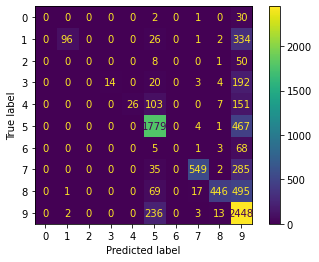

In [220]:
scoring(y_test, test_y_pred, cls, vect_X_test)

RANDOM FOREST ---- NOT GOOD

In [222]:
rdmfst = RandomForestClassifier(max_depth=20)
rdmfst.fit(vect_X_train, y_train)
y_pred = rdmfst.predict(vect_X_test)

In [183]:
f'The accuracy score is: {round(accuracy_score(y_test, test_y_pred)*100, 2)}%'

'The accuracy score is: 34.39%'

Accuracy: 34.4%
Precision: 43.2%
Recall: 24.1%
F1: 24.2%


Classification Report


              precision    recall  f1-score   support

           0       1.00      0.09      0.17        33
           1       0.11      0.44      0.18       459
           2       0.36      0.15      0.21        59
           3       0.05      0.09      0.07       233
           4       0.49      0.12      0.20       287
           5       0.66      0.29      0.41      2251
           6       0.02      0.19      0.03        77
           7       0.80      0.21      0.34       871
           8       0.34      0.34      0.34      1028
           9       0.48      0.47      0.47      2702

    accuracy                           0.34      8000
   macro avg       0.43      0.24      0.24      8000
weighted avg       0.51      0.34      0.38      8000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


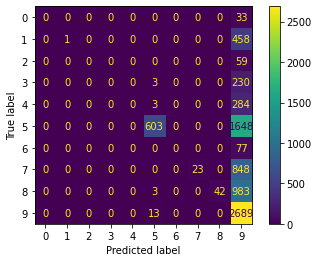

In [184]:
scoring(y_test, test_y_pred, rdmfst, vect_X_test)

DECISION TREE

In [197]:
dtree = DecisionTreeClassifier(max_depth=50)
dtree.fit(vect_X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [198]:
test_y_pred = dtree.predict(vect_X_test)

In [199]:
f'The accuracy score is: {round(accuracy_score(y_test, test_y_pred)*100, 2)}%'

'The accuracy score is: 57.66%'

In [200]:
recall_scr = round(recall_score(y_test, test_y_pred, average='macro'), 2) * 100
f'The recall score is {recall_scr}%'

'The recall score is 30.0%'

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

Accuracy: 57.7%
Precision: 67.9%
Recall: 30.2%
F1: 34.9%


Classification Report


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.86      0.39      0.54       459
           2       0.00      0.00      0.00        59
           3       0.89      0.07      0.13       233
           4       0.81      0.31      0.45       287
           5       0.91      0.41      0.56      2251
           6       1.00      0.01      0.03        77
           7       0.96      0.54      0.69       871
           8       0.89      0.32      0.48      1028
           9       0.45      0.96      0.61      2702

    accuracy                           0.58      8000
   macro avg       0.68      0.30      0.35      8000
weighted avg       0.74      0.58      0.55      8000



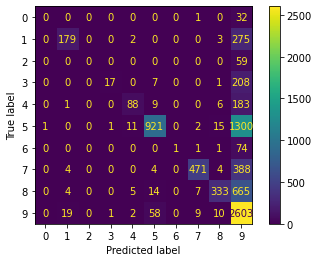

In [201]:
scoring(y_test, test_y_pred, dtree, vect_X_test)

KNN classifier


In [210]:
neigh = KNeighborsClassifier(n_neighbors=17, weights='distance')
neigh.fit(vect_X_train, y_train)

KNeighborsClassifier(n_neighbors=17, weights='distance')

In [211]:
test_y_pred = neigh.predict(vect_X_test)
f'The accuracy score is: {round(accuracy_score(y_test, test_y_pred)*100, 2)}%'

'The accuracy score is: 67.85%'

In [212]:
recall_scr = round(recall_score(y_test, test_y_pred, average='macro'), 2) * 100
f'The recall score is {recall_scr}%'

'The recall score is 45.0%'

Accuracy: 67.8%
Precision: 81.4%
Recall: 44.8%
F1: 52.9%


Classification Report


              precision    recall  f1-score   support

           0       0.89      0.24      0.38        33
           1       0.83      0.53      0.65       459
           2       0.93      0.24      0.38        59
           3       0.80      0.21      0.33       233
           4       0.85      0.42      0.56       287
           5       0.81      0.67      0.73      2251
           6       0.82      0.12      0.20        77
           7       0.89      0.66      0.76       871
           8       0.77      0.52      0.62      1028
           9       0.56      0.87      0.68      2702

    accuracy                           0.68      8000
   macro avg       0.81      0.45      0.53      8000
weighted avg       0.73      0.68      0.67      8000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


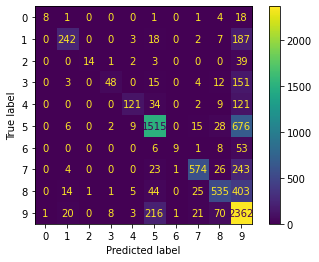

In [213]:
scoring(y_test, test_y_pred, neigh, vect_X_test)